In [1]:
!pip install azure-storage-blob azure-identity

In [3]:
 from azure.storage.blob import BlobServiceClient

In [5]:
blob_account_url='https://azureaimll.blob.core.windows.net'
storage_credential='pmdXYtFb4hpgJ/Xie/ITYHug3EsNtHBTbMnaFcF8C8gk+oAY5UzTOsylkFpnNcAKC8VMk2ZKGSuL+AStT89pSA=='
blob_service_client=BlobServiceClient(account_url=blob_account_url,credential=storage_credential)
blob_service_client


In [7]:
#create new container
new_container=blob_service_client.create_container("vscodecontainer",public_access="container")
new_container

In [9]:
new_container.get_container_properties()

{'name': 'vscodecontainer', 'last_modified': datetime.datetime(2024, 11, 28, 17, 35, 1, tzinfo=datetime.timezone.utc), 'etag': '"0x8DD0FD2FCA7B009"', 'lease': {'status': 'unlocked', 'state': 'available', 'duration': None}, 'public_access': 'container', 'has_immutability_policy': False, 'deleted': None, 'version': None, 'has_legal_hold': False, 'metadata': {}, 'encryption_scope': <azure.storage.blob._models.ContainerEncryptionScope object at 0x000001F851661E80>, 'immutable_storage_with_versioning_enabled': False}

In [11]:
# List out All containers
all_containers=blob_service_client.list_containers()
all_containers

<iterator object azure.core.paging.ItemPaged at 0x1f8516c2420>

In [13]:
for container in all_containers:
    print(container)

{'name': 'cloudcontainer', 'last_modified': datetime.datetime(2024, 11, 28, 3, 30, 6, tzinfo=datetime.timezone.utc), 'etag': '"0x8DD0F5CF4287DC3"', 'lease': {'status': 'unlocked', 'state': 'available', 'duration': None}, 'public_access': 'container', 'has_immutability_policy': False, 'deleted': None, 'version': None, 'has_legal_hold': False, 'metadata': None, 'encryption_scope': <azure.storage.blob._models.ContainerEncryptionScope object at 0x000001F851661CD0>, 'immutable_storage_with_versioning_enabled': False}
{'name': 'vscodecontainer', 'last_modified': datetime.datetime(2024, 11, 28, 17, 35, 1, tzinfo=datetime.timezone.utc), 'etag': '"0x8DD0FD2FCA7B009"', 'lease': {'status': 'unlocked', 'state': 'available', 'duration': None}, 'public_access': 'container', 'has_immutability_policy': False, 'deleted': None, 'version': None, 'has_legal_hold': False, 'metadata': None, 'encryption_scope': <azure.storage.blob._models.ContainerEncryptionScope object at 0x000001F851662210>, 'immutable_sto

In [15]:
all_containers=blob_service_client.list_containers()
list(all_containers)

[{'name': 'cloudcontainer', 'last_modified': datetime.datetime(2024, 11, 28, 3, 30, 6, tzinfo=datetime.timezone.utc), 'etag': '"0x8DD0F5CF4287DC3"', 'lease': {'status': 'unlocked', 'state': 'available', 'duration': None}, 'public_access': 'container', 'has_immutability_policy': False, 'deleted': None, 'version': None, 'has_legal_hold': False, 'metadata': None, 'encryption_scope': <azure.storage.blob._models.ContainerEncryptionScope object at 0x000001F851663E00>, 'immutable_storage_with_versioning_enabled': False},
 {'name': 'vscodecontainer', 'last_modified': datetime.datetime(2024, 11, 28, 17, 35, 1, tzinfo=datetime.timezone.utc), 'etag': '"0x8DD0FD2FCA7B009"', 'lease': {'status': 'unlocked', 'state': 'available', 'duration': None}, 'public_access': 'container', 'has_immutability_policy': False, 'deleted': None, 'version': None, 'has_legal_hold': False, 'metadata': None, 'encryption_scope': <azure.storage.blob._models.ContainerEncryptionScope object at 0x000001F8516C26C0>, 'immutable_

In [17]:
## Delete the Container
all_container=blob_service_client.list_containers()
for container in all_container:
    print("deleting:",'vscodecontainer')
    blob_service_client.delete_container('vscodecontainer')

deleting: vscodecontainer
deleting: vscodecontainer


In [19]:
# we deleted all containers
#So create one container
#upload a blob in that container
#access the blob from container
 
blob_account_url='https://azureaimll.blob.core.windows.net'
storage_credential='pmdXYtFb4hpgJ/Xie/ITYHug3EsNtHBTbMnaFcF8C8gk+oAY5UzTOsylkFpnNcAKC8VMk2ZKGSuL+AStT89pSA=='
blob_service_client=BlobServiceClient(account_url=blob_account_url,credential=storage_credential)
new_container=blob_service_client.create_container("createcontainer",public_access="container")
new_container

In [21]:
#upload a one csv file
blob_name='cleandata.csv'
file_path=r'C:\Users\User\Downloads\clean_data.csv'
container_client=blob_service_client.get_container_client('createcontainer')
blob_client=container_client.get_blob_client(blob_name)

with open(file_path,"rb") as data:
    blob_client.upload_blob(data,overwrite=True)


In [23]:
#upload a one txt file
blob_name='sample.txt'
file_path=r'C:\Users\User\Downloads\sample.txt'
container_client=blob_service_client.get_container_client('createcontainer')
blob_client=container_client.get_blob_client(blob_name)

with open(file_path,"rb") as data:
    blob_client.upload_blob(data,overwrite=True)
    

In [25]:
#upload a one image file
blob_name='Aayut.jpg'
file_path=r'C:\Users\User\Downloads\IMG-20230525-WA0005.jpg'
container_client=blob_service_client.get_container_client('createcontainer')
blob_client=container_client.get_blob_client(blob_name)

with open(file_path,"rb") as data:
    blob_client.upload_blob(data,overwrite=True)

In [27]:
#Get all the blob 
container_client=blob_service_client.get_container_client('createcontainer')
for blob in container_client.list_blobs():
    print(blob)

{'name': 'Aayut.jpg', 'container': 'createcontainer', 'snapshot': None, 'version_id': None, 'is_current_version': None, 'blob_type': <BlobType.BLOCKBLOB: 'BlockBlob'>, 'metadata': {}, 'encrypted_metadata': None, 'last_modified': datetime.datetime(2024, 11, 28, 17, 35, 24, tzinfo=datetime.timezone.utc), 'etag': '0x8DD0FD30ABCEC71', 'size': 87137, 'content_range': None, 'append_blob_committed_block_count': None, 'is_append_blob_sealed': None, 'page_blob_sequence_number': None, 'server_encrypted': True, 'copy': {'id': None, 'source': None, 'status': None, 'progress': None, 'completion_time': None, 'status_description': None, 'incremental_copy': None, 'destination_snapshot': None}, 'content_settings': {'content_type': 'application/octet-stream', 'content_encoding': None, 'content_language': None, 'content_md5': bytearray(b'D\xec\xd6K\xe5\xc9\x00\xb0a\xb1\xd2\xb8A\x8a\xee\x80'), 'content_disposition': None, 'cache_control': None}, 'lease': {'status': 'unlocked', 'state': 'available', 'durat

In [31]:
blob_client=blob_service_client.get_blob_client('createcontainer','cleandata.csv')
data=blob_client.download_blob()
import pandas as pd
pd.read_csv(data)

,Unnamed: 0,Name,Domain,Age,Location,Salary,Exp
0,0,Mike,Datascience,34,Mumbai,5000,2
1,1,Teddy,Testing,45,Bangalore,10000,3
2,2,Umar,Dataanalyst,50,Bangalore,15000,4
3,3,Jane,Analytics,50,Hyderbad,20000,4
4,4,Uttam,Statistics,67,Bangalore,30000,5
5,5,Kim,NLP,55,Delhi,60000,10


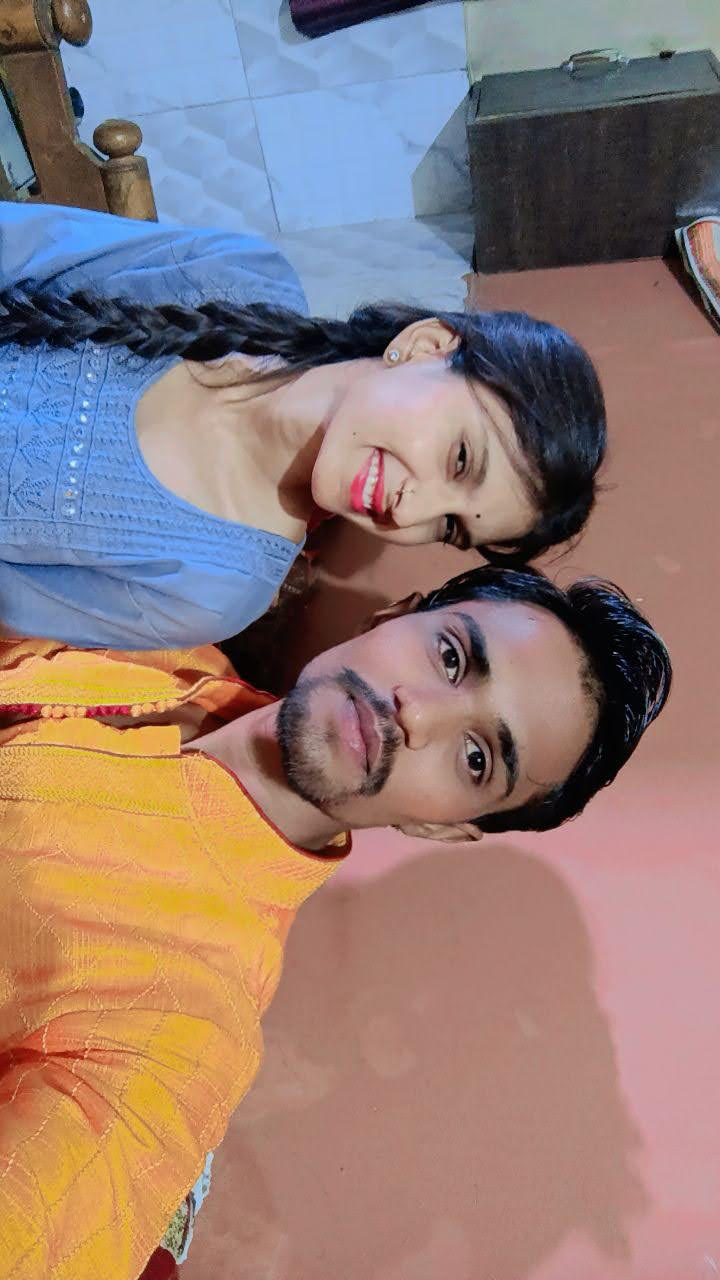

In [37]:
blob_client=blob_service_client.get_blob_client('createcontainer','Aayut.jpg')
data=blob_client.download_blob()
from PIL import Image
Image.open(data)

In [39]:
blob_client=blob_service_client.get_blob_client('createcontainer','sample.txt')
data=blob_client.download_blob()
import pandas as pd
pd.read_csv(data)

,**Artificial Intelligence (AI)** refers to the simulation of human intelligence in machines that are programmed to think,learn,and solve problems. AI is an interdisciplinary field that draws from computer science,mathematics,cognitive science,and other areas. It can be classified into two broad categories:
0,### 1. **Narrow AI (Weak AI)**,NaN,NaN,NaN,NaN,NaN
1,This type of AI is designed to perform a speci...,such as:,NaN,NaN,NaN,NaN
2,- **Voice Assistants** like Siri or Alexa,NaN,NaN,NaN,NaN,NaN
3,- **Recommendation Systems** (e.g.,Netflix or Amazon recommendations),NaN,NaN,NaN,NaN
4,- **Image Recognition** (e.g.,facial recognition),NaN,NaN,NaN,NaN
5,- **Autonomous Vehicles** (self-driving cars),NaN,NaN,NaN,NaN,NaN
6,### 2. **General AI (Strong AI)**,NaN,NaN,NaN,NaN,NaN
7,This hypothetical form of AI would have the ab...,learn,and apply intelligence across a wide range of...,much like a human. General AI would not be re...,it is the subject of ongoing research.,NaN
8,---,NaN,NaN,NaN,NaN,NaN
9,### Key Concepts in AI,NaN,NaN,NaN,NaN,NaN
